In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd

2023-09-04 14:57:34.316046: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 14:57:35.059448: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
import pickle
tokenizer = pickle.load(open('tokenizer_data.pkl', 'rb'))

In [4]:
tokenizer=tokenizer['tokenizer']

In [5]:
model=tf.keras.models.load_model('model.h5')

2023-09-04 14:57:40.583215: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-04 14:57:40.719862: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-04 14:57:40.719912: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-04 14:57:40.721925: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-04 14:57:40.722008: I tensorflow/compile

In [14]:
def predict(image,tokenizer,model):
    img=cv2.imread(image)
    plt.imshow(img)
    img=cv2.resize(img,(224,224))
    img=img/255.0
    img=np.array([img])
    img.shape
    in_text=' water'
    for i in range(38):
        sequence=tokenizer.texts_to_sequences([in_text])[0]
        sequence=pad_sequences([sequence],maxlen=37,padding='pre')
        sequence=np.array(sequence)
        y=model.predict([sequence,img])
        y=np.argmax(y)
        word=''
        for word,index in tokenizer.word_index.items():
            if index==y:
                word=word
                break
        in_text+=' '+word
        if word=='endseq':
            break
    return in_text

1/1 [==============================] - 0s 32ms/step


' water jumphouse on a polaris vehicle outdoors together on the background bricks outdoors rides a lake in the wintertime around a frozen lake in the wintertime silly faces outdoors overlooking the mountains below together at night overlooking the snow'

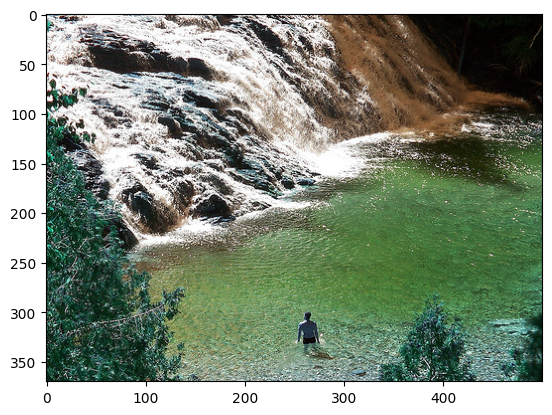

In [15]:
predict('./Images/1357724865_4faf4e1418.jpg',tokenizer,model)